# Setup

In [23]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from typing import List

# Problem

Describe problem here. 

See e.g.:

* [Wiki](https://en.wikipedia.org/wiki/German_tank_problem)
* [Example 1](https://www.isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/)
* [Example 2](http://mcleonard.github.io/sampyl/examples/german_tank_problem.html)

## Generating data

In [41]:
# Defining data
def generate_data(true_N: int, size: int, save: bool=True):
    """Generate CSV file containing tank serial numbers"""
    observations = np.random.randint(low=1, high=true_N, size=size)
    data = pd.DataFrame({"serial_no": observations})
    if save:
        data.to_csv("german_tanks.csv", index=False)
    return data

# Generate data
captured_tanks = 7
german_records = 369
data = generate_data(true_N=german_records, size=captured_tanks)

data

,serial_no
0,240
1,7
2,66
3,122
4,96
5,352
6,87


## Sampling from the posterior

In [46]:
with pm.Model() as model:
    # Defining prior distribution
    N = pm.DiscreteUniform("num_tanks", lower=data["serial_no"].max(), upper=1000)
    # Defining likelihood
    likelihood = pm.DiscreteUniform("observed_sn", lower=1, upper=N, observed=data["serial_no"])
    
    # Defining MCMC algorithm (NOTE: Discrete data --> Metropolis)
    step = pm.Metropolis()
    # Defining initial values
    start = {"num_tanks": largest_sn}
    
    # Sampling
    trace = pm.sample(draws=100000, step=step, start=start)
    # Discarding the burn-in period
    burned_trace = trace[10000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [num_tanks]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [00:31<00:00, 12569.01draws/s]
The number of effective samples is smaller than 10% for some parameters.


## Checking convergence

/Users/sean/miniconda3/envs/fagdag/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


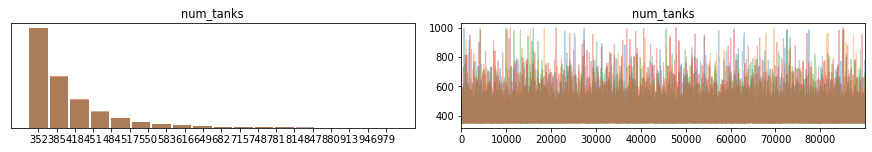

In [47]:
# Plotting trace
az.plot_trace(burned_trace)
plt.show()

According to our model, the expected number of tanks is approximately 369.

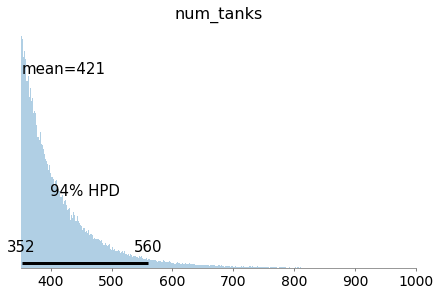

In [48]:
# Plotting posterior distribution
az.plot_posterior(burned_trace)
plt.show()

In [49]:
# Printing summary of posterior distribution
az.summary(burned_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
num_tanks,420.82,78.171,352.0,560.0,0.814,0.608,9215.0,8276.0,15077.0,11260.0,1.0
